### <p style="text-align: right;"> &#9989; Nathan Kurt</p>
#### <p style="text-align: right;"> &#9989; </p>

# Day 11 In-Class Assignment: Image Analysis
<img src="https://proxy.duckduckgo.com/iu/?u=https%3A%2F%2Fcdn-images-1.medium.com%2Fmax%2F1200%2F1*57E5I14kQDRIHLKUWLvAYw.jpeg&f=1" width=500px>

### Goals for this pre-class assignment
By the end of this assignment, you should be able to:
* Load images into python as arrays
* Use array indexing to manipulate, analyze, crop, etc. images
* Gain some beginning insights into agent-based modeling by analyzing individual pixels

### Assignment instructions

Work with your groupmates to complete this assignment to the best of your abilities. If you have questions about the material, please ask questions. This assignment is very important for preparing you for the upcoming material in this course.

## Review of the Pre-Class Assignment
---

## Basic Image Analysis

**Do This:** Using the code from the pre-class assignment, load in the image `landscape.jpeg` into this notebook. We will be using this image for the following examples. These are meant to help you become more familiar with working with 2D arrays, indexing, masking, etc.

In [63]:
## Put your code here
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from PIL import Image
picture = Image.open("landscape.jpg")


Now that the image has been loaded in, let's separate the red, green, and blue channels into separate 2D arrays.

In [64]:
img_array = np.asarray(picture)
picture_array = img_array.copy() ##We have to make a copy of the array so as to not overwrite the original image
red_array, green_array, blue_array = picture_array[:,:,0], picture_array[:,:,1], picture_array[:,:,2]

Now that the image has been loaded and the red, green, and blue data has been separated, let's look at each component individually.

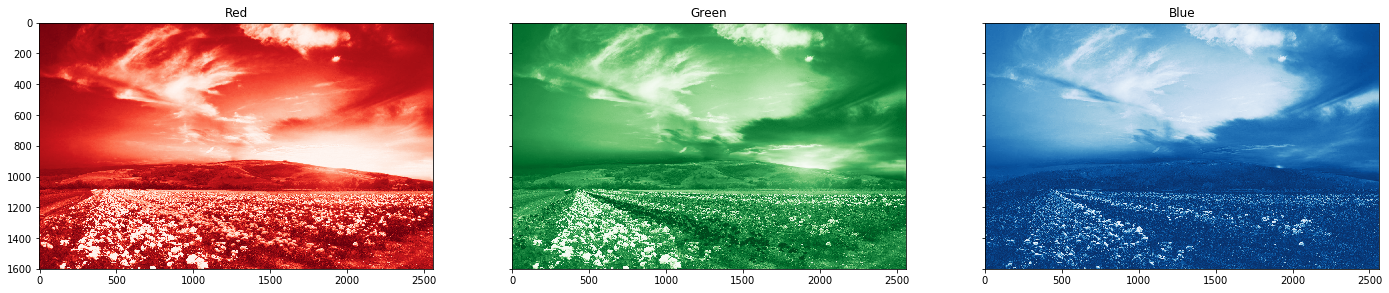

In [65]:
##Make subplot of all three channels at once
fig, axarr = plt.subplots(1, 3, figsize = (24, 8), sharey = True)

##Red
axarr[0].set_title("Red")
axarr[0].imshow(red_array, cmap = "Reds_r")
#axarr[0].axis('off')

##Green
axarr[1].set_title("Green")
axarr[1].imshow(green_array, cmap = "Greens_r")
#axarr[1].axis('off')


##Blue
axarr[2].set_title("Blue")
axarr[2].imshow(blue_array, cmap = "Blues_r")
#axarr[2].axis('off')

Each channel is a 2D array. By separating it out like this, we are able to manually edit how much red is in a picture, for example, or have a finer tuned control over the color saturation in our picture. We will use these channels shortly to do some image editing. But first, we will use indexing to show how we crop images.

**Do This:** Index each of the arrays so that the new image only consists of the flowers. When you are done, use the following function from the pre-class assignment to show the new image.

In [66]:
def makeImageFromRGB(red_array, green_array, blue_array):
    image = np.dstack((red_array,green_array,blue_array)).astype(np.uint8)
    plt.figure(figsize = (10,10))
    plt.imshow(image)

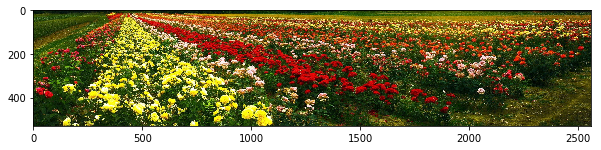

In [67]:
new_red = red_array[1070:1600, :]
new_green = green_array[1070:1600, :]
new_blue = blue_array[1070:1600, :]
makeImageFromRGB(new_red,new_green,new_blue)
    

**Question:** As a prelude to doing some more complicated image analysis, let's consider a question. What is the dominant color channel in this image (i.e. is the picture more red or more blue or neither?)? Is there one? How are you going to decide this and what result will tell you which color channel (red, green, or blue) is dominant in this image or if one exists? Discuss this with your group mates and make note of your decisions below.

looks more red to me. 

In [34]:
img_array.shape

(1600, 2560, 3)

**Do This:** We are going to try and recreate a popular filter and apply it to our image. Sepia is a filter which edits the image's color to look like the following:

<img src="https://proxy.duckduckgo.com/iu/?u=https%3A%2F%2Ffthmb.tqn.com%2Fd5gqOo_vZbBjkczd7mWXH5do9_4%3D%2F400x250%2Ffilters%3Ano_upscale()%2Fabout%2Fsepia01-LM-56a454cb3df78cf77281dfd1.png&f=1" width = 500px>

We are going to try and recreate this filter using image processing techniques. Given an input image, we want to create an output image where we have applied the sepia filter. The algorithm to do this is given below. 

```
sepia_r = .393*r + .769*g + .189*b
sepia_g = .349*r + .686*g + .168*b
sepia_b = .272*r + .534*g + .131*b

If any value is greater than 255, set it equal to 255
```


Remember, NumPy arrays are great for applying numerical operations on data. Make a new red, green, and blue channel which represent applying the sepia filter and show the new image using the function from above.

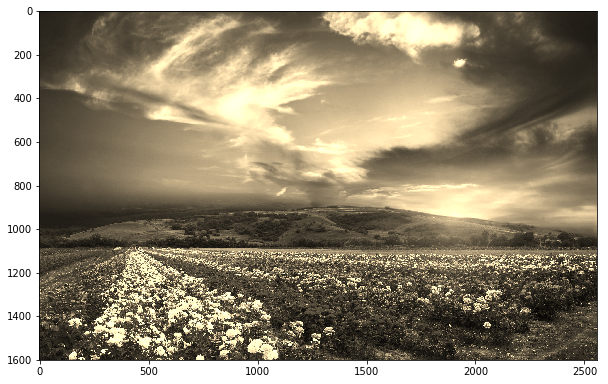

In [68]:
# Put your code here
new_green_sepia = .349 * red_array + .686 * green_array + .168 * blue_array
new_red_sepia = .393 * red_array + .769 * green_array + .189 * blue_array
new_blue_sepia = .272 * red_array + .534 * green_array + .131 * blue_array

makeImageFromRGB(np.clip(new_red_sepia,0,255),np.clip(new_green_sepia,0,255),np.clip(new_blue_sepia,0,255))

**Do This:** We can also make edits to each of the channels individually and see what the result is on the image. You did a little bit of this in the pre-class assignment. Work through each of the color changes below and use the `makeImageFromRGB` function to show the results of those changes. Comment on anything interesting that you notice.

1. Reduce the red channel by a factor of 2.

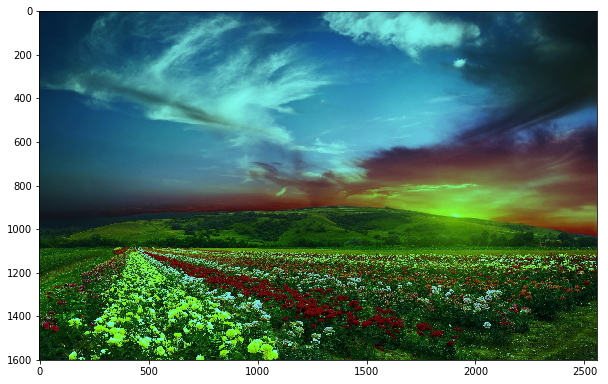

In [69]:
red_array = red_array / 2
makeImageFromRGB(red_array,green_array,blue_array)

2. Reduce the green channel by a factor of 4 _only in the section of the image where the flowers are_.

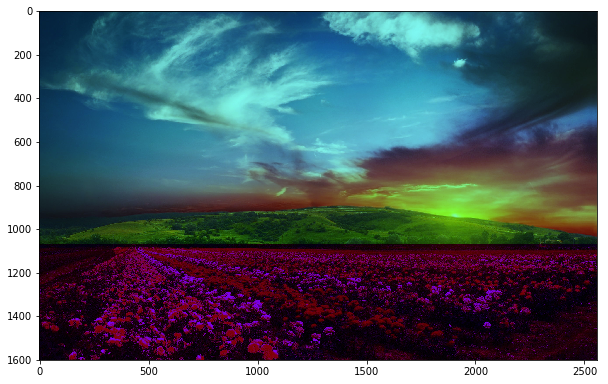

In [71]:
# Put your code here
green_array[1070:1600, :] =green_array[1070:1600, :] / 4

makeImageFromRGB(red_array, green_array, blue_array)

---
## Pixel Counting

In this part of the assignment, we are going to do an exercise in counting pixels. Pixel counting can often be a part of image analysis models as a way of measuring what fraction of an image satisfies some condition. In our example, we will be doing a basic exercise. Consider the following $225 \times 225$ pixelated image:

Shape of the image is: (225, 225)


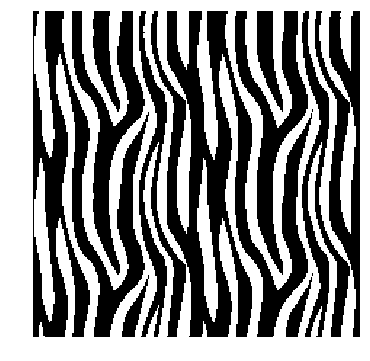

In [73]:
zebra = Image.open("zebra.png")
plt.figure(figsize = (6,6))
plt.imshow(zebra, origin = "lower_l")
plt.axis('off')

zebra_array = np.asarray(zebra).copy()[:,:,0]
print("Shape of the image is:", zebra_array.shape)

For this example, we are going to try and write a piece of code that counts how many black pixels are touching a white pixel. Though this may be a contrived example, you may find the code you write to be particularly valuable when we start talking about agent based models next week. But for now, let's worry about the problem at hand.

How do we go about modeling this? If we consider some pixel, $P$, in our image at some coordinate $(x,y)$ / $(i,j)$ / $(row, column)$, whichever convention you prefer, we can look at each of the pixels that are surrounding it, $D$, by searching over a specific set of indices, as shown in the following diagram

<img src="https://proxy.duckduckgo.com/iu/?u=https%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2Fthumb%2Fe%2Fe8%2FVon_Neumann_neighborhood.svg%2F1024px-Von_Neumann_neighborhood.svg.png&f=1" width = 300px>

We are going to write a model which looks at each pixel, $P$, and if that pixel is a black pixel, which has a value of $0$, then we will check to see if any of the neighboring points, $D$, are a white pixel (which take the value $255$). If so, we will count it.

**Do This:** The first thing we need to be cautious of is what happens when we are at the "edge" of our array. If we are in the first or last column or the first or last row, then not all of the neighboring points shown in this diagram will exist. Take for example in the pixel at index $[0,0]$. There is no pixel at $[0-1,0]$ or $[0,0-1]$ because those are "off" of the image. As a group, **write a function to see whether an index is on the image or not.** Some of the code has been written for you.

In [92]:
# Finish this code
def onBoard(i, j, image):
    if i <= image.shape[0]-1 and i >= 0: # You need some more conditions here! 
                                         # We've checked i, but what about j?
        return True
    else:
        
        return False

**Do This:** In order to ensure that your code is working, run the following cell. If your code is right, all of the print statements should output "True."

In [99]:
##Some test cases to make sure your code is working correct, all of these should print True
print(onBoard(0,0,zebra_array) == True)
print(onBoard(0,1,zebra_array) == True)
print(onBoard(225,225,zebra_array) == False) # This would indicate that the pixel is off the board
print(onBoard(224,224,zebra_array) == True)
print(onBoard(35,167,zebra_array) == True)

True
True
True
True
True


**Do This:** Now that your group has a working function to check to see whether an index is a valid index for our image or array, we now need a function that will get the neighboring pixel values for a given pixel, $P$, if those neighboring indices are allowable indices. As a group, using your `onBoard` function, **write a function to get the values of neighboring pixels at a given index.** The code has already been started for you.

In [94]:
#Finish this code
def getNeighbors(i,j, board):
    # The following list contains the indices of the neighbors for a pixel at (i.j)
    neighborhood = [(i-1, j), (i, j-1), (i+1, j), (i, j+1)]
    
    neighbor_values = []
    for neighbor in neighborhood:
        if onBoard(i, j , board):
            neighbor_values.append(board[neighbor[0], neighbor[1]])
        
    return neighbor_values

**Do This:** In order to ensure that your code is working, run the following cell. If your code is right, all of the print statements should output "True."

In [95]:
##Some test cases to see if your function is written correctly, these should all print True
print(getNeighbors(0,0,zebra_array) == [0, 0])
print(getNeighbors(225,225,zebra_array) == [])
print(getNeighbors(75,0,zebra_array) == [0,0,255])
print(getNeighbors(125,12,zebra_array) == [255,255,255,0])

False
True
False
True


**Do This:** Now, let's put this altogether. The outline for what we want our model to do is as follows

```
initialize count at 0
initialize tot_black_pixels at 0
for each pixel in our image:
    if the pixel has a value of 0:
        add 1 to tot_black_pixels
        get the neighboring pixels
        if any of them have a value of 255:
            add 1 to count
```

As a group, flush out this pseudocode and **report what percentage of black pixels are next to _at least_ one white pixel.**

In [98]:
# Put your code here
count = 0
tot_black_pixels = 0
for pixel in zebra_array:
    if pixel == 0:
        tot_black_pixels += 1
        if 255 in (getNeighbors(pixel,pixel+1, zebra_array)):
            count += 1

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

---
## Time permitting: Application of Image Analysis

**If you have time:** These examples that you have been working through so far are nice for getting familiar with working with images as arrays, and working with 2D arrays in general, but rarely do we ever just have to change some color channels and select subregions of an image for no reason. As such, let's consider an example. One way that image analysis is commonly used is for identifying the locations of objects in an image. In this particular example, we are going to be looking at an actual satellite image of people on a public beach. The following code loads in the image.

In [ ]:
beach = Image.open("beach.jpeg")
plt.figure(figsize = (15,8))
plt.imshow(beach)
plt.axis('off')

beach_array = np.asarray(beach)
beach_array = beach_array.copy()
beach_red, beach_green, beach_blue = beach_array[:,:,0], beach_array[:,:,1], beach_array[:,:,2]

**Do This:** With your groupmates, brainstorm how you might use some of the techniques that you have been working with in this assignment and in your work with arrays in general to try and clearly identify where the people are in this image. Write down the results of this brainstorming below as well as any pseudocode your group comes up with.

*Put your brainstorming here*

```
Write your pseudocode here

```

The following code is one way that you could potentially go about solving this problem. After each chunk of code, talk with your group about **what the code is doing** and explain **why it is doing it that way**.

In [ ]:
# Block 1
tolerance = 15
beach_red[ (beach_red < (242-tolerance)) | (beach_red > (242+tolerance))] = 1
beach_green[ (beach_green < 207-tolerance) | (beach_green >  207+tolerance)] = 1
beach_blue[ (beach_blue < 165-tolerance) | (beach_blue >  165+tolerance) ] = 1
##Pay careful attention to how we masked this! You aren't expected to know this syntax specifically, but
##it can be useful in the future. You read the "|" symbol as "or", but this is a very special case and doesn't always
##work the way you intend it to, so be careful using it!

*Put your description here*

In [ ]:
# Block 2
beach_red[beach_red != 1] = 255
beach_green[beach_green != 1] = 255
beach_blue[beach_blue != 1] = 255

*Put your description here*

In [ ]:
# Block 3
beach_red[beach_red != 255] = 0
beach_green[beach_green != 255] = 0
beach_blue[beach_blue != 255] = 0

*Put your description here*

In [ ]:
# Block 4
fig, axarr = plt.subplots(2, 1, figsize = (20, 15))
axarr[0].imshow(beach_red+beach_green+beach_blue, alpha = 10.0, cmap = "binary")
axarr[0].axis("off")

axarr[1].imshow(beach_red+beach_green+beach_blue, alpha = 10.0, cmap = "binary")
axarr[1].imshow(beach, alpha = 0.4)
axarr[1].axis("off")

*Put your description here*

**Question:** How did the model do? How do you interpret these results? How do you identify a person in the above image?

*Put your answer here*

---
---

In [82]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://goo.gl/forms/FvtMSNZOV17jhmFi1" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "In-class assignments" folder, find the submission link for Day 11, and upload it there.

&#169; Copyright 2018,  Michigan State University Board of Trustees